<a href="https://colab.research.google.com/github/anandramm/Machine_learning-/blob/master/Hackathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [82]:
train_df=pd.read_csv('/content/Train.csv')
test_df=pd.read_csv('/content/Test.csv')

In [ ]:
train_df.isna().sum()

session_id          0
session_number      0
client_agent      160
device_details      0
date                0
purchased           0
added_in_cart       0
checked_out         0
time_spent          0
dtype: int64

In [89]:
#train_df.drop(['client_agent'],axis=1,inplace=True)
#train_df.corr()
train_df['session_number'].unique().sum()

2152898

In [ ]:
train_df.head()
train_df.set_index('session_id')

,device_details,date,purchased,added_in_cart,checked_out,time_spent
session_id,,,,,,
57f879e70d3c5fc2a98102d64c9fd84e,Desktop - Chrome,2020-01-22,1,0,0,236.886
a5442b0c7c33d0a811e7661e556b2de8,iPhone - iOS,2020-02-27,1,0,0,1277.455
305cb1486ed8610c00b37007926cb2c4,iPhone - MobileWeb,2019-08-01,0,0,0,21.704
f2c1ecc9993f0071df91ba178450498c,Desktop - IE,2019-12-30,0,1,0,455.201
e460830ae295e55d2216ebdc761ab9a6,iPhone - Web,2019-09-10,0,0,0,1164.877
...,...,...,...,...,...,...
b6aa30da97fa3c95989c47ccf5ab4e9f,iPhone - Web,2019-11-20,0,0,0,20.601
58b62e9fa867d622662b8a4096fdc3f0,iPhone - iOS,2019-09-26,0,0,0,1537.666
109f7f9b8384e46fc88f580b328298e8,Desktop - Chrome,2019-08-13,0,0,0,22.711


In [24]:
#train_df['date']=pd.to_datetime(train_df['date'])
train_df.head()
train_df['device_details'].unique()

array(['Desktop - Chrome', 'iPhone - iOS', 'iPhone - MobileWeb',
       'Desktop - IE', 'iPhone - Web', 'Android Phone - Android',
       'Desktop - Firefox', 'Android Tablet - Web', 'iPad - Web',
       'Other - Other', 'Desktop - Safari', 'Android Phone - Web',
       'iPad - iOS', 'Android Phone - MobileWeb', 'Unknown - MobileWeb',
       'Android Tablet - Android', 'Android Tablet - MobileWeb'],
      dtype=object)

In [ ]:
train_df['year']=train_df['date'].apply(lambda date:date.year)
train_df['month']=train_df['date'].apply(lambda date:date.month)

In [ ]:
train_df.head()

,session_id,device_details,date,purchased,added_in_cart,checked_out,time_spent,year,month
0,57f879e70d3c5fc2a98102d64c9fd84e,Desktop - Chrome,2020-01-22,1,0,0,236.886,2020,1
1,a5442b0c7c33d0a811e7661e556b2de8,iPhone - iOS,2020-02-27,1,0,0,1277.455,2020,2
2,305cb1486ed8610c00b37007926cb2c4,iPhone - MobileWeb,2019-08-01,0,0,0,21.704,2019,8
3,f2c1ecc9993f0071df91ba178450498c,Desktop - IE,2019-12-30,0,1,0,455.201,2019,12
4,e460830ae295e55d2216ebdc761ab9a6,iPhone - Web,2019-09-10,0,0,0,1164.877,2019,9


In [ ]:
train_df.drop('date',axis=1,inplace=True)

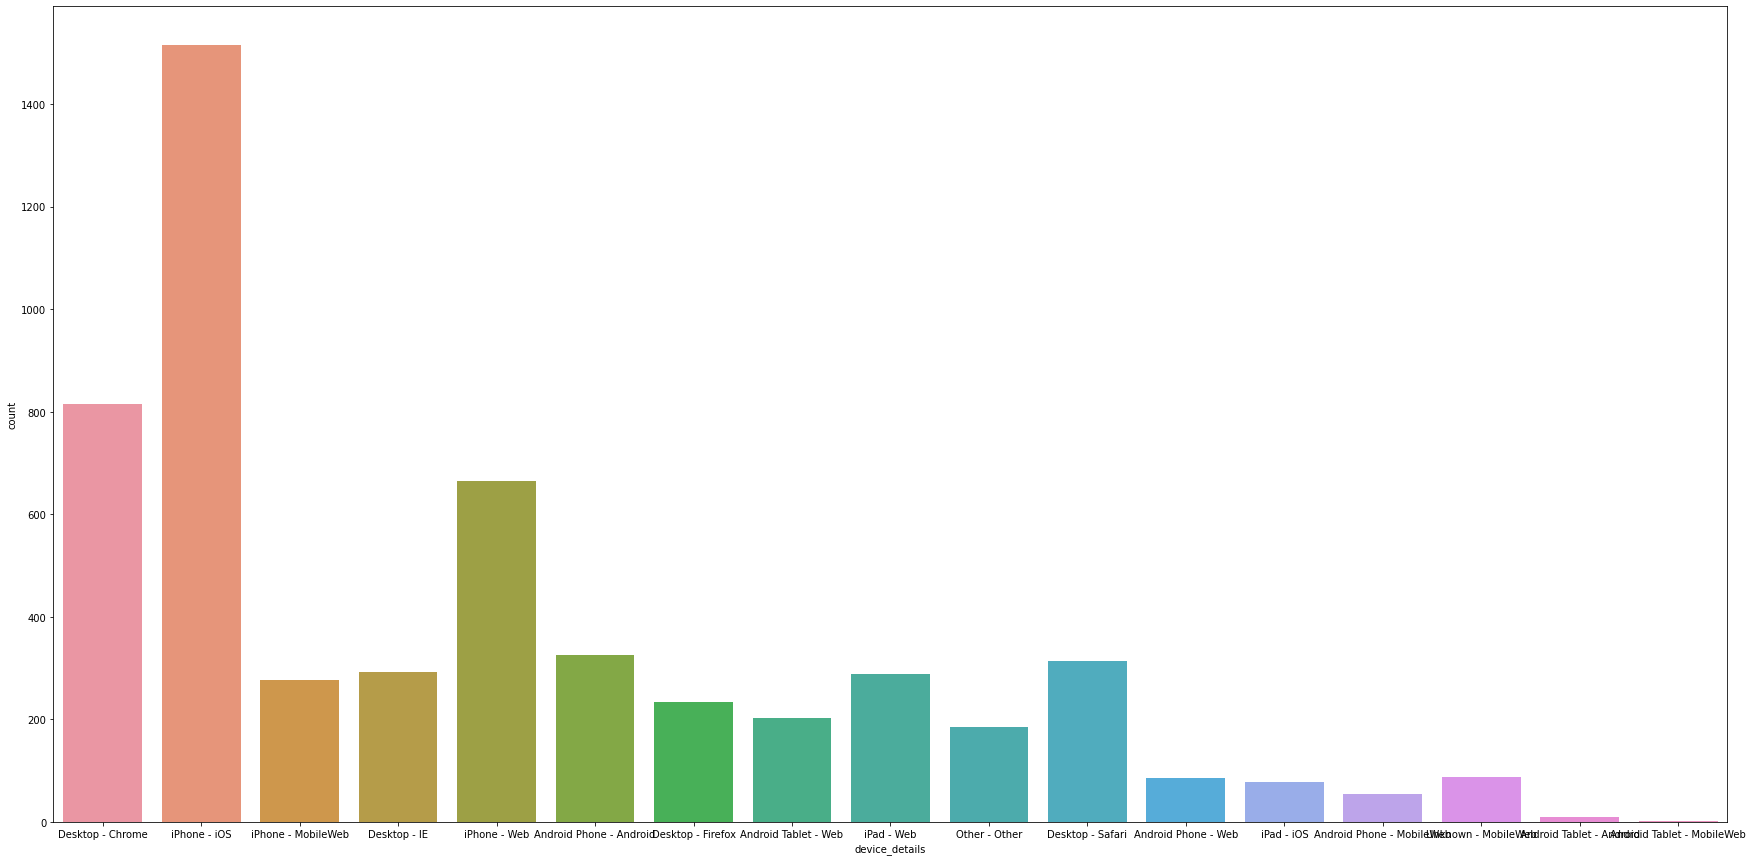

In [ ]:
plt.figure(figsize=(30,15))
sns.countplot(x=train_df['device_details'])

In [53]:
X=train_df.drop(['time_spent','device_details','session_id'],axis=1).values
y=train_df.time_spent.values

In [54]:
from sklearn.model_selection import train_test_split        
y = np.asarray(y).astype('float32')
X = np.asarray(X).astype('float32')

In [55]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=101,test_size=0.3)

In [56]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [60]:
model=Sequential()
model.add(Dense(6,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(6,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(6,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1))
model.compile(loss='mse',optimizer='adam')

In [61]:
early_stop=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)

In [63]:
model.fit(x=X_train,y=y_train,epochs=600,verbose=2,validation_data=(X_test,y_test),callbacks=[early_stop])

Epoch 1/600
119/119 - 0s - loss: 3456881.7500 - val_loss: 2317250.0000
Epoch 2/600
119/119 - 0s - loss: 3475286.0000 - val_loss: 2320723.2500
Epoch 3/600
119/119 - 0s - loss: 3494341.5000 - val_loss: 2322762.7500
Epoch 4/600
119/119 - 0s - loss: 3476998.5000 - val_loss: 2318085.2500
Epoch 5/600
119/119 - 0s - loss: 3487353.0000 - val_loss: 2331308.5000
Epoch 6/600
119/119 - 0s - loss: 3473385.2500 - val_loss: 2327755.7500
Epoch 7/600
119/119 - 0s - loss: 3498767.0000 - val_loss: 2342546.5000
Epoch 8/600
119/119 - 0s - loss: 3523932.5000 - val_loss: 2353375.2500
Epoch 9/600
119/119 - 0s - loss: 3495539.7500 - val_loss: 2325344.5000
Epoch 10/600
119/119 - 0s - loss: 3455247.0000 - val_loss: 2342191.0000
Epoch 11/600
119/119 - 0s - loss: 3503411.5000 - val_loss: 2335785.0000
Epoch 12/600
119/119 - 0s - loss: 3488541.7500 - val_loss: 2325878.7500
Epoch 13/600
119/119 - 0s - loss: 3467412.0000 - val_loss: 2323550.2500
Epoch 14/600
119/119 - 0s - loss: 3472712.0000 - val_loss: 2320366.2500
E

In [66]:
np.sqrt(2276187.5000)

1508.7039139605888

In [69]:
losses=pd.DataFrame(model.history.history)

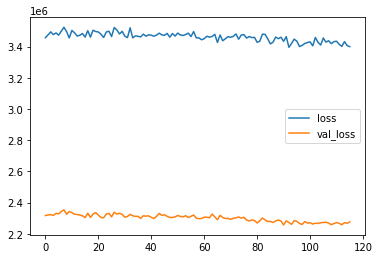

In [71]:
losses.plot()

In [73]:
predictions=model.predict(X_test)

In [76]:
from sklearn.metrics import mean_squared_log_error
np.sqrt(mean_squared_log_error(y_test, predictions))

1.8722619

In [92]:
#test_df.drop(['session_id','session_number','client_agent','device_details'],axis=1,inplace=True)
test_df.head()

,date,purchased,added_in_cart,checked_out
0,2020-01-07,1,0,0
1,2020-02-13,0,0,0
2,2019-10-14,1,0,0
3,2020-01-26,0,0,0
4,2020-01-29,0,0,0


In [96]:
test_df['date']=pd.to_datetime(test_df['date'])
test_df['year']=test_df['date'].apply(lambda date:date.year)
test_df['month']=test_df['date'].apply(lambda date:date.month)

In [101]:
#test_df.drop('date',axis=1,inplace=True)
A=test_df.values

In [104]:
time_shopping=model.predict(A)

In [105]:
np.sqrt(mean_squared_log_error(y_test, predictions))

1.8722619

In [107]:
submission=pd.DataFrame(time_shopping)

In [109]:
submission.to_csv('my_submission_file.csv', index=False)